# Exercise 4.10 Charts for Achievement 4 (Only charts)

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# Set project path (using Option key + right click on folder to set project path name)
path = '/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong'

In [12]:
# Load final dataset from first part of 4.10
df_cfo = pd.read_pickle('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/02 Data/Prepared Data/ords_prods_cust_cfo_FINAL.pkl')

In [13]:
# Import step 7 tables
step7_profile_agg = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "step7_profile_agg.pkl"))

In [14]:
# Import step 8 tables
profile_region = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "profile_region.pkl"))
profile_department = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "profile_department.pkl"))

In [34]:
# Viz path
viz_path = "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations"

In [15]:
print(df_cfo.shape)

(30993489, 44)


In [16]:
df_cfo.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,first_order_flag,product_id,add_to_cart_order,...,state_abbrev,low_activity_flag,age_group,income_group,department,shopper_profile,missing_department_flag,compound_persona,revenue_tier,marketing_priority
0,2539329,1,prior,1,2,8,0.0,True,196,1,...,AL,0,Middle-Aged Adult,Low Income,beverages,Snack & Beverage Shopper,0,Middle-Aged Adult | Family | Low Income | Snac...,Low Value,Tier 3 – Long-Tail Support
1,2539329,1,prior,1,2,8,0.0,True,14084,2,...,AL,0,Middle-Aged Adult,Low Income,dairy eggs,Health-Focused Shopper,0,Middle-Aged Adult | Family | Low Income | Heal...,Low Value,Tier 2 – Growth Opportunity
2,2539329,1,prior,1,2,8,0.0,True,12427,3,...,AL,0,Middle-Aged Adult,Low Income,snacks,Snack & Beverage Shopper,0,Middle-Aged Adult | Family | Low Income | Snac...,Low Value,Tier 3 – Long-Tail Support
3,2539329,1,prior,1,2,8,0.0,True,26088,4,...,AL,0,Middle-Aged Adult,Low Income,snacks,Snack & Beverage Shopper,0,Middle-Aged Adult | Family | Low Income | Snac...,Low Value,Tier 3 – Long-Tail Support
4,2539329,1,prior,1,2,8,0.0,True,26405,5,...,AL,0,Middle-Aged Adult,Low Income,household,Household Essentials Shopper,0,Middle-Aged Adult | Family | Low Income | Hous...,Low Value,Tier 3 – Long-Tail Support


In [17]:
# Check
print("df_cfo:", df_cfo.shape)
print("step7_profile_agg:", step7_profile_agg.shape)
print("profile_region:", profile_region.shape)
print("profile_department:", profile_department.shape)

df_cfo: (30993489, 44)
step7_profile_agg: (7, 7)
profile_region: (28, 4)
profile_department: (21, 4)


In [18]:
# Check for columns
print("df_cfo has these key cols:",
      all(c in df_cfo.columns for c in ["shopper_profile", "region", "department", "prices", "revenue_tier"]))

df_cfo has these key cols: True


# Step 9: Creating visualization charts

**Chart 1: Revenue Concentration by Tier**

In [19]:
# Build tier
tier_summary = (df_cfo
    .groupby("revenue_tier")["prices"]
    .sum()
    .reset_index(name="total_revenue"))

tier_summary["revenue_share_pct"] = (tier_summary["total_revenue"] / tier_summary["total_revenue"].sum() * 100).round(2)
tier_summary = tier_summary.sort_values("revenue_share_pct", ascending=False)

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60758/612463344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("revenue_tier")["prices"]


In [20]:
# Check
display(tier_summary)

,revenue_tier,total_revenue,revenue_share_pct
3,Premium Value,66963769.6,27.76
2,High Value,61991695.4,25.70
1,Mid Value,58895896.2,24.42
0,Low Value,53342924.6,22.12


In [21]:
persona_rev = (df_cfo
    .groupby("shopper_profile")["prices"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values("total_revenue", ascending=False))

persona_rev["revenue_share_pct"] = (
    persona_rev["total_revenue"] / persona_rev["total_revenue"].sum() * 100).round(2)

persona_rev["cumulative_revenue_pct"] = persona_rev["revenue_share_pct"].cumsum().round(2)

In [22]:
# Check
display(persona_rev)

,shopper_profile,total_revenue,revenue_share_pct,cumulative_revenue_pct
2,Health-Focused Shopper,115574066.2,47.92,47.92
4,Mixed / Other Shopper,35025182.5,14.52,62.44
5,Snack & Beverage Shopper,31586694.2,13.10,75.54
1,Family Stock-Up Shopper,30696345.2,12.73,88.27
0,Convenience Shopper,16620074.3,6.89,95.16
3,Household Essentials Shopper,11691923.4,4.85,100.01
6,Unknown / Missing Dept,0.0,0.00,100.01


In [23]:
# Assign marketing tiers
def assign_marketing_tier(cum_pct):
    if cum_pct <= 50:
        return "Tier 1 – Core Revenue Drivers"
    elif cum_pct <= 80:
        return "Tier 2 – Growth Opportunity"
    else:
        return "Tier 3 – Long-Tail Support"

In [24]:
# Check
persona_rev["marketing_tier"] = persona_rev["cumulative_revenue_pct"].apply(assign_marketing_tier)
display(persona_rev)

,shopper_profile,total_revenue,revenue_share_pct,cumulative_revenue_pct,marketing_tier
2,Health-Focused Shopper,115574066.2,47.92,47.92,Tier 1 – Core Revenue Drivers
4,Mixed / Other Shopper,35025182.5,14.52,62.44,Tier 2 – Growth Opportunity
5,Snack & Beverage Shopper,31586694.2,13.10,75.54,Tier 2 – Growth Opportunity
1,Family Stock-Up Shopper,30696345.2,12.73,88.27,Tier 3 – Long-Tail Support
0,Convenience Shopper,16620074.3,6.89,95.16,Tier 3 – Long-Tail Support
3,Household Essentials Shopper,11691923.4,4.85,100.01,Tier 3 – Long-Tail Support
6,Unknown / Missing Dept,0.0,0.00,100.01,Tier 3 – Long-Tail Support


In [25]:
# Build tier summary
tier_summary = (persona_rev
    .groupby("marketing_tier")["total_revenue"]
    .sum()
    .reset_index())

tier_summary["revenue_share_pct"] = (
    tier_summary["total_revenue"] / tier_summary["total_revenue"].sum() * 100).round(2)

In [26]:
# Check
display(tier_summary)

,marketing_tier,total_revenue,revenue_share_pct
0,Tier 1 – Core Revenue Drivers,115574066.2,47.92
1,Tier 2 – Growth Opportunity,66611876.7,27.62
2,Tier 3 – Long-Tail Support,59008342.9,24.47


In [27]:
# Build chart 1
#Instacart colors
instacart_green = "#43B02A"
instacart_orange = "#F36F21"
instacart_gray = "#6B7280"

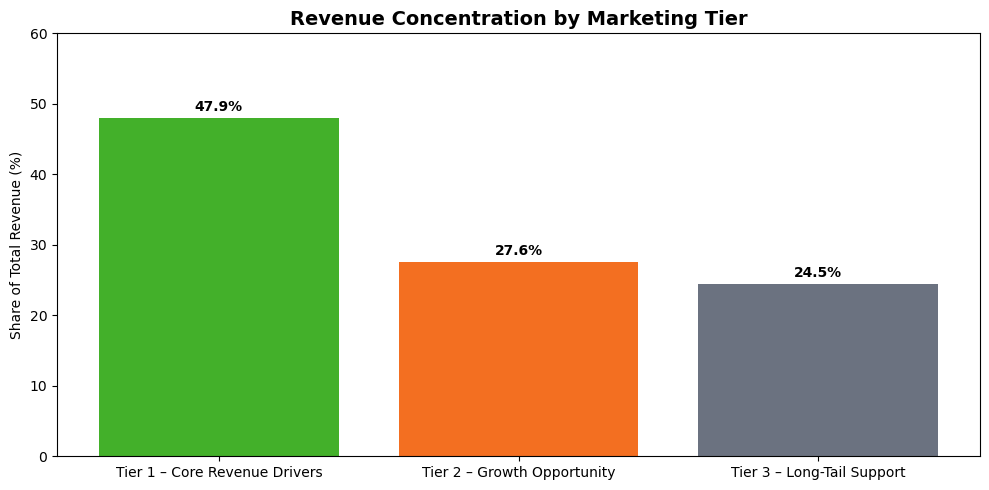

In [38]:
# Build plot
plt.figure(figsize=(10,5))
bars = plt.bar(
    tier_summary["marketing_tier"],
    tier_summary["revenue_share_pct"],
    color=[instacart_green, instacart_orange, instacart_gray])

# Title and labels
plt.title("Revenue Concentration by Marketing Tier", fontsize=14, weight="bold")
plt.ylabel("Share of Total Revenue (%)")
plt.ylim(0,60)

for bar, val in zip(bars, tier_summary["revenue_share_pct"]):
    plt.text(bar.get_x()+bar.get_width()/2, val+1, f"{val:.1f}%", ha="center", weight="bold")

plt.tight_layout()

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

_Chart 1 Insight: Nearly half of Instacart revenue is driven by a small set of core personas — growth should prioritize deepening Tier-1 and migrating Tier-2 customers upward rather than spreading spend evenly across the base._

**Chart 2: Tier-1 Demographic Composition (Age/Family/Income)**

Tier-1 demographic distribution of Age, Family, and Income. The goal is to quantify WHO makes up Tier-1, so stakeholders know who to target/protect.

In [29]:
# Tier-1 customers only (core revenue engine)
tier1_df = df_cfo[df_cfo["marketing_priority"] == "Tier 1 – Core Revenue Drivers"].copy()

In [30]:
# Build demographic revenue summary
tier1_demo_summary = (
    tier1_df
    .groupby(["age_group", "family_status", "income_group"])
    .agg(
        total_revenue=("prices", "sum"),
        order_lines=("prices", "count"),
        unique_customers=("user_id", "nunique"))
    .reset_index()
    .sort_values("total_revenue", ascending=False))

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60758/2246034323.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "family_status", "income_group"])


In [31]:
# Check
tier1_demo_summary.head(10)

,age_group,family_status,income_group,total_revenue,order_lines,unique_customers
14,Older Adult,Family,High Income,42656315.4,5350309,30299
13,Older Adult,Family,Middle Income,35259582.6,4210490,28539
7,Middle-Aged Adult,Family,Middle Income,12740600.4,1551267,15954
1,Young Adult,Family,Middle Income,11330900.6,1377525,14091
17,Older Adult,Single,High Income,7959912.2,965397,10006
16,Older Adult,Single,Middle Income,7453912.5,905584,9333
10,Middle-Aged Adult,Single,Middle Income,0.0,0,0
15,Older Adult,Single,Low Income,0.0,0,0
12,Older Adult,Family,Low Income,0.0,0,0
11,Middle-Aged Adult,Single,High Income,0.0,0,0


In [32]:
# Age-Group revenue concentration
viz_tier1_age = (
    tier1_demo_summary
    .groupby("age_group")
    .agg(
        total_revenue=("total_revenue", "sum"),
        unique_customers=("unique_customers", "sum"))
    .reset_index()
    .sort_values("total_revenue", ascending=False))

total_rev = viz_tier1_age["total_revenue"].sum()
viz_tier1_age["revenue_share_pct"] = (viz_tier1_age["total_revenue"] / total_rev * 100).round(2)

viz_tier1_age

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60758/470557283.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age_group")


,age_group,total_revenue,unique_customers,revenue_share_pct
2,Older Adult,93329722.7,78177,79.50
1,Middle-Aged Adult,12740600.4,15954,10.85
0,Young Adult,11330900.6,14091,9.65


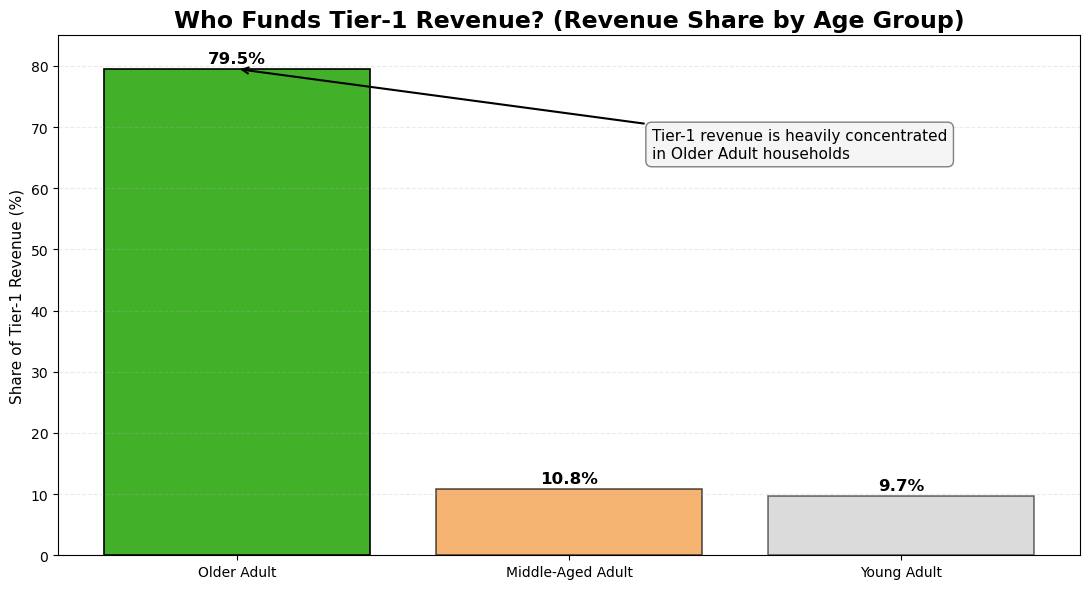

In [39]:
# Instacart-branded visualization
plt.figure(figsize=(11,6))

bars = plt.bar(
    viz_tier1_age["age_group"],
    viz_tier1_age["revenue_share_pct"])

# Instacart palette
colors = ["#43B02A", "#F28C28", "#BFBFBF"]
alphas = [1.0, 0.65, 0.55]

for bar, c, a in zip(bars, colors, alphas):
    bar.set_color(c)
    bar.set_alpha(a)
    bar.set_edgecolor("black")
    bar.set_linewidth(1.2)

plt.title("Who Funds Tier-1 Revenue? (Revenue Share by Age Group)", fontsize=17, weight="bold")
plt.ylabel("Share of Tier-1 Revenue (%)", fontsize=11)
plt.xlabel("")
plt.ylim(0, 85)
plt.grid(axis="y", linestyle="--", alpha=0.25)

# Value labels
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h+1, f"{h:.1f}%", ha="center", fontsize=12, weight="bold")

# Callout
plt.annotate(
    "Tier-1 revenue is heavily concentrated\nin Older Adult households",
    xy=(0, viz_tier1_age.iloc[0]["revenue_share_pct"]),
    xytext=(1.25, 65),
    arrowprops=dict(arrowstyle="->", lw=1.5),
    bbox=dict(boxstyle="round,pad=0.4", fc="#F5F5F5", ec="gray"),
    fontsize=11)

plt.tight_layout()

#Save Image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

_Chart 2: Older Adults generate ~80% of Tier-1 revenue._

**Chart 3: Tier-1 Revenue Split - Family vs Single**

Stacked bar: all Tier-1 revenue with colored segments to indicate Family vs Single contribution.

In [40]:
# Tier-1 customers only (core revenue engine)
tier1_df = df_cfo[df_cfo["marketing_priority"] == "Tier 1 – Core Revenue Drivers"].copy()

In [41]:
# Build visualization table (Tier-1 revenue share by family_status)
viz_tier1_family_split = (tier1_df
    .groupby("family_status")
    .agg(total_revenue=("prices", "sum"))
    .reset_index())

viz_tier1_family_split["revenue_share_pct"] = (
    viz_tier1_family_split["total_revenue"] /
    viz_tier1_family_split["total_revenue"].sum() * 100).round(2)


In [42]:
# Check
viz_tier1_family_split

,family_status,total_revenue,revenue_share_pct
0,Family,101987399.0,86.87
1,Single,15413824.7,13.13


_Calculate each family segment’s share of Tier-1 revenue using summed prices at the order-line level._

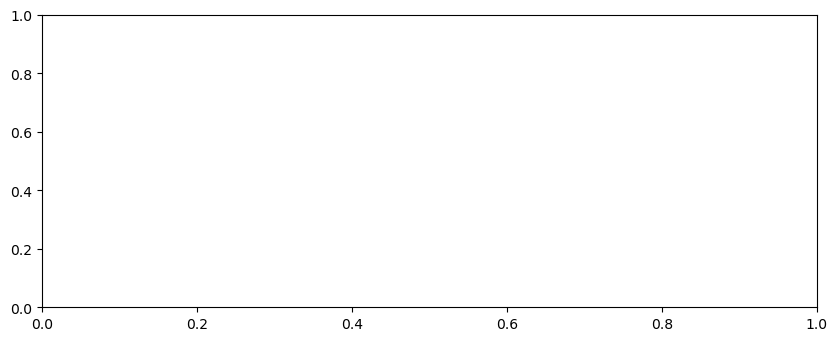

In [43]:
# Plot: single stacked bar (Family vs Single)
fig, ax = plt.subplots(figsize=(10, 3.8))

# Instacart colors
instacart_green  = "#43B02A"
instacart_orange = "#F28C28"
colors = [instacart_green, instacart_orange]

In [52]:
labels = viz_tier1_family_split["family_status"].tolist()
values = viz_tier1_family_split["revenue_share_pct"].tolist()

bottom = 0
for label, val, color in zip(labels, values, colors):
    ax.bar("Tier-1 Revenue", val, bottom=bottom, color=color, edgecolor="white", linewidth=2)

    ax.text(
        0, bottom + val/2,
        f"{label}\n{val:.1f}%",
        ha="center", va="center",
        fontsize=12 if label == "Family" else 11,
        weight="bold" if label == "Family" else "normal",
        color="white" if label == "Family" else "black")
    bottom += val

ax.set_title("Who Funds Instacart's Tier-1 Revenue?", fontsize=18, fontweight="bold", pad=14)
ax.set_ylabel("Share of Tier-1 Revenue (%)", fontsize=12)
ax.set_ylim(0, 100)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

ax.set_xlabel("")
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=11)

plt.figtext(
    0.5, -0.02,
    "Instacart's core revenue engine is structurally dependent on Family households.",
    ha="center", fontsize=12, fontweight="bold")

plt.tight_layout()

# Save Image
plt.savefig("tier1_revenue_chart.png") 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

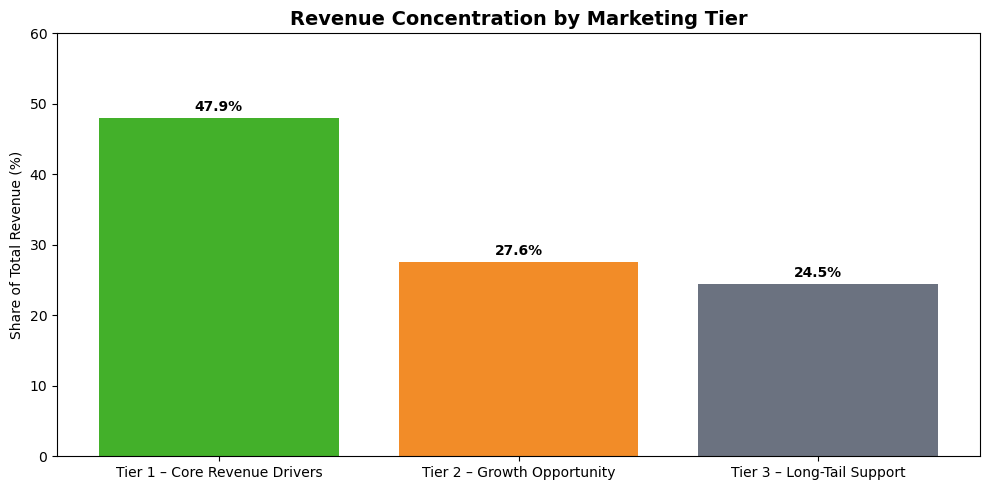

In [53]:
labels = viz_tier1_family_split["family_status"].tolist()
values = viz_tier1_family_split["revenue_share_pct"].tolist()

bottom = 0
for label, val, color in zip(labels, values, colors):
    ax.bar("Tier-1 Revenue", val, bottom=bottom, color=color, edgecolor="white", linewidth=2)

    ax.text(
        0, bottom + val/2,
        f"{label}\n{val:.1f}%",
        ha="center", va="center",
        fontsize=12 if label == "Family" else 11,
        weight="bold" if label == "Family" else "normal",
        color="white" if label == "Family" else "black")
    bottom += val

ax.set_title("Who Funds Instacart's Tier-1 Revenue?", fontsize=18, fontweight="bold", pad=14)
ax.set_ylabel("Share of Tier-1 Revenue (%)", fontsize=12)
ax.set_ylim(0, 100)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

ax.set_xlabel("")
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=11)

plt.figtext(
    0.5, -0.02,
    "Instacart's core revenue engine is structurally dependent on Family households.",
    ha="center", fontsize=12, fontweight="bold")

plt.tight_layout()

# Save Image for the first plot
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_01_tier1_family_split.png",
    dpi=300, bbox_inches="tight")

# Build second plot - Note: This should be separate from the first plot's savefig command
plt.figure(figsize=(10,5))
bars = plt.bar(
    tier_summary["marketing_tier"],
    tier_summary["revenue_share_pct"],
    color=[instacart_green, instacart_orange, instacart_gray])

# Title and labels
plt.title("Revenue Concentration by Marketing Tier", fontsize=14, weight="bold")
plt.ylabel("Share of Total Revenue (%)")
plt.ylim(0,60)

for bar, val in zip(bars, tier_summary["revenue_share_pct"]):
    plt.text(bar.get_x()+bar.get_width()/2, val+1, f"{val:.1f}%", ha="center", weight="bold")

plt.tight_layout()

# Save image for the second plot
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

**Chart 4: Tier-1 Revenue Split by Income Group**

Donut chart for share of total. The goal is to show which income tier funds Tier-1 revenue (share %).

In [54]:
# Tier-1 revenue base only
tier1_df = df_cfo[df_cfo["marketing_priority"] == "Tier 1 – Core Revenue Drivers"].copy()

In [55]:
# Aggregate Tier-1 Revenue by Income Group
viz_tier1_income = (
    tier1_df
    .groupby("income_group", dropna=False)
    .agg(total_revenue=("prices", "sum"))
    .reset_index())

viz_tier1_income["revenue_share_pct"] = (
    viz_tier1_income["total_revenue"] /
    viz_tier1_income["total_revenue"].sum() * 100).round(2)

viz_tier1_income = viz_tier1_income.sort_values("revenue_share_pct", ascending=False)

viz_tier1_income

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60758/807488439.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("income_group", dropna=False)


,income_group,total_revenue,revenue_share_pct
1,Middle Income,66784996.1,56.89
2,High Income,50616227.6,43.11
0,Low Income,0.0,0.00


In [56]:
# Drop Zero-Revenue Buckets
donut_df = viz_tier1_income[viz_tier1_income["revenue_share_pct"] > 0].copy()

labels = donut_df["income_group"].tolist()
sizes  = donut_df["revenue_share_pct"].tolist()

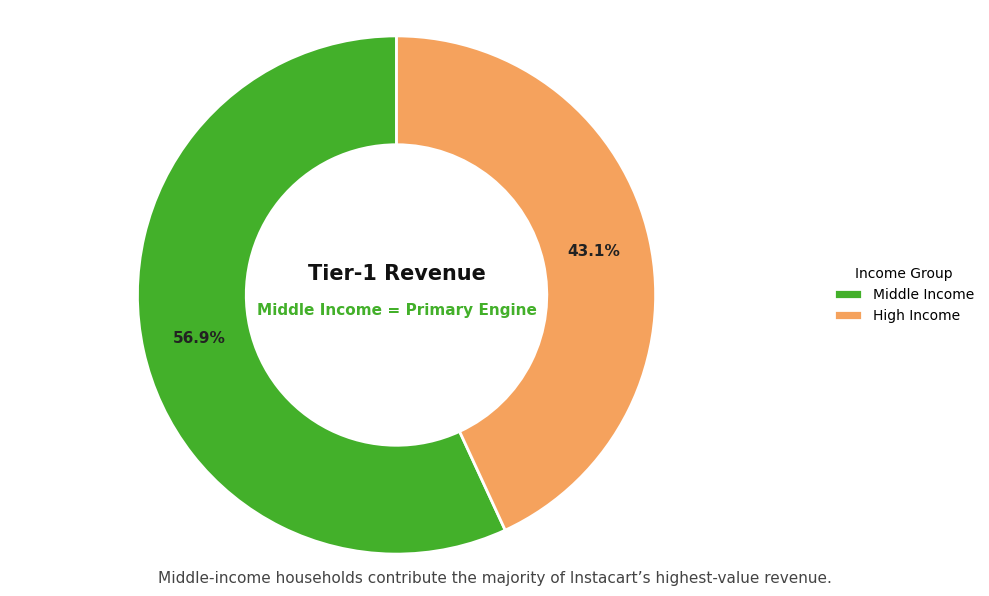

In [62]:
# Create donut chart for Tier-1 Revenue
fig, ax = plt.subplots(figsize=(10,6))

colors = ["#43B02A", "#F5A25D", "#BFBFBF"]

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.78,
    colors=colors[:len(sizes)],
    wedgeprops=dict(width=0.42, edgecolor="white", linewidth=2))

for t in autotexts:
    t.set_fontsize(11)
    t.set_weight("bold")
    t.set_color("#222222")

# Donut hole
centre_circle = plt.Circle((0,0), 0.55, fc="white")
ax.add_artist(centre_circle)

# Callout
ax.text(0, 0.08, "Tier-1 Revenue", ha="center", va="center",
        fontsize=15, weight="bold", color="#111111")

ax.text(0, -0.06, "Middle Income = Primary Engine",
        ha="center", va="center", fontsize=11, weight="bold", color="#43B02A")

ax.legend(wedges, labels, title="Income Group",
          loc="center left", bbox_to_anchor=(1.05, 0.5), frameon=False)

plt.figtext(0.5, 0.02,
    "Middle-income households contribute the majority of Instacart’s highest-value revenue.",
    ha="center", fontsize=11, color="#444444")

ax.axis("equal")
plt.tight_layout()

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

**Chart 5: Tier-1 Department Dominance (Top 10 Departments by Revenue)**

The purpose is to show which departments generate the most Tier-1 revenue.

In [63]:
# Tier-1 customers only (core revenue engine)
tier1_df = df_cfo[df_cfo["marketing_priority"] == "Tier 1 – Core Revenue Drivers"].copy()

In [64]:
# Build Tier-1 revenue by department
tier1_department_dominance = (
    tier1_df.groupby("department", dropna=False)
    .agg(total_revenue=("prices", "sum"))
    .reset_index()
    .sort_values("total_revenue", ascending=False))

tier1_total_rev = tier1_department_dominance["total_revenue"].sum()

tier1_department_dominance["revenue_share_pct"] = (
    tier1_department_dominance["total_revenue"] / tier1_total_rev * 100).round(2)

In [67]:
# Check
tier1_department_dominance.head(10)

,department,total_revenue,revenue_share_pct
14,produce,53539003.1,45.60
5,dairy eggs,31733581.4,27.03
7,frozen,6479132.0,5.52
12,pantry,5663007.8,4.82
9,meat seafood,4626753.4,3.94
1,beverages,3828814.9,3.26
4,canned goods,3100318.5,2.64
6,dry goods pasta,2441184.2,2.08
2,breakfast,2032149.5,1.73
15,snacks,2020728.4,1.72


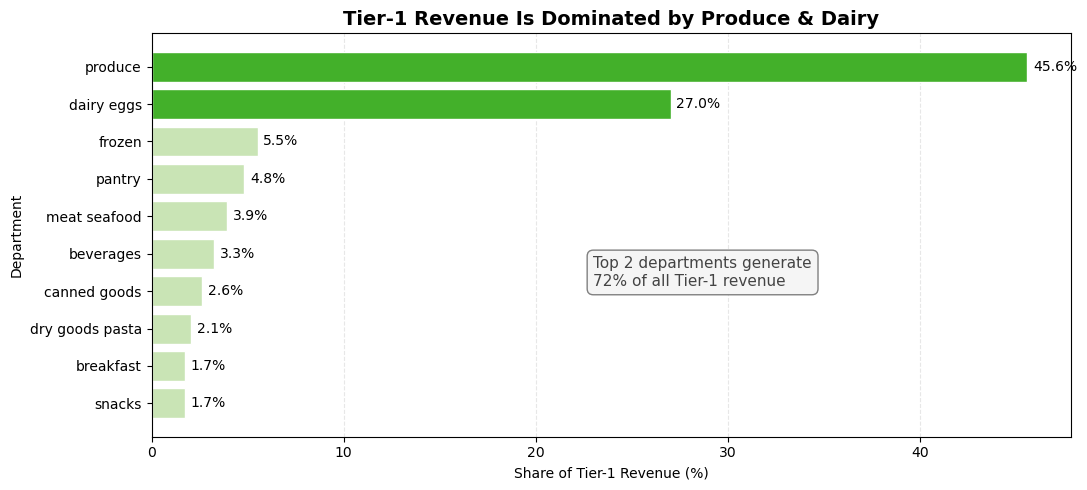

In [69]:
# Plot chart 5
# Top 10 only
viz_tier1_dept = tier1_department_dominance.head(10).copy()

# Sort for horizontal bar chart
viz = viz_tier1_dept.sort_values("revenue_share_pct")

instacart_green = "#43B02A"
instacart_orange = "#F28C28"
neutral = "#C9E4B5" 
fig, ax = plt.subplots(figsize=(11, 5))

# Highlight the big 2 (produce + dairy eggs) like your Notebook 1 chart
colors = [
    instacart_green if d in ["produce", "dairy eggs"] else neutral
    for d in viz["department"]]

bars = ax.barh(viz["department"], viz["revenue_share_pct"], color=colors, edgecolor="white")

# Value labels
for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.3, bar.get_y() + bar.get_height()/2, f"{w:.1f}%", va="center", fontsize=10)

ax.set_title("Tier-1 Revenue Is Dominated by Produce & Dairy", fontsize=14, weight="bold")
ax.set_xlabel("Share of Tier-1 Revenue (%)")
ax.set_ylabel("Department")

ax.grid(axis="x", linestyle="--", alpha=0.3)
ax.set_axisbelow(True)

# Strategic callout note (right side of chart)
ax.text(
    23,
    3.5,
    "Top 2 departments generate\n72% of all Tier-1 revenue",
    fontsize=11,
    color="#444444",
    ha="left",
    va="center",
    bbox=dict(boxstyle="round,pad=0.4", fc="#F5F5F5", ec="gray"))

plt.tight_layout()

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

**Chart 6: Tier-2 Add-On Growth Concentration**

The purpose is to show how concentrated Tier-2 Add-On revenue is across personas. The input is the tier-2 addon_personas that was already aggregated by compound_personas.

The output is a Pareto curve (cumulative revenue share).

In [70]:
# Chart 6: Build Tier-2 Add-On persona table
# Filter to Tier-2 only
tier2_df = df_cfo[df_cfo["marketing_priority"] == "Tier 2 – Growth Opportunity"].copy()

# Aggregate Tier-2 revenue by compound persona
tier2_addon_personas = (
    tier2_df
    .groupby("compound_persona", dropna=False)
    .agg(total_revenue=("prices", "sum"))
    .reset_index())

# Keep only personas that actually contribute revenue
tier2_addon_personas = tier2_addon_personas[tier2_addon_personas["total_revenue"] > 0].copy()

# Sort + compute revenue share + cumulative share
tier2_addon_personas = tier2_addon_personas.sort_values("total_revenue", ascending=False).reset_index(drop=True)

total_rev = tier2_addon_personas["total_revenue"].sum()
tier2_addon_personas["revenue_share_pct"] = (tier2_addon_personas["total_revenue"] / total_rev * 100)
tier2_addon_personas["cumulative_share_pct"] = tier2_addon_personas["revenue_share_pct"].cumsum()

In [73]:
# Validation: what should Top 5 be?
top5 = tier2_addon_personas.loc[:4, "revenue_share_pct"].sum()
print("Top 5 personas share (%):", round(top5, 1))

Top 5 personas share (%): 32.0


In [74]:
# Pareto table
pareto_t2 = tier2_addon_personas.copy().reset_index(drop=True)

total_rev = pareto_t2["total_revenue"].sum()
pareto_t2["revenue_share_pct"] = pareto_t2["total_revenue"] / total_rev * 100
pareto_t2["cumulative_share_pct"] = pareto_t2["revenue_share_pct"].cumsum()
pareto_t2["persona_rank"] = pareto_t2.index + 1

In [75]:
# Check
pareto_t2.head()

,compound_persona,total_revenue,revenue_share_pct,cumulative_share_pct,persona_rank
0,Older Adult | Family | Middle Income | Snack &...,5569646.7,7.548536,7.548536,1
1,Middle-Aged Adult | Family | Low Income | Heal...,4907257.8,6.650801,14.199337,2
2,Young Adult | Family | Low Income | Health-Foc...,4800717.9,6.506407,20.705744,3
3,Middle-Aged Adult | Single | Middle Income | H...,4234347.2,5.738806,26.444550,4
4,Older Adult | Family | Low Income | Health-Foc...,4111068.2,5.571726,32.016276,5


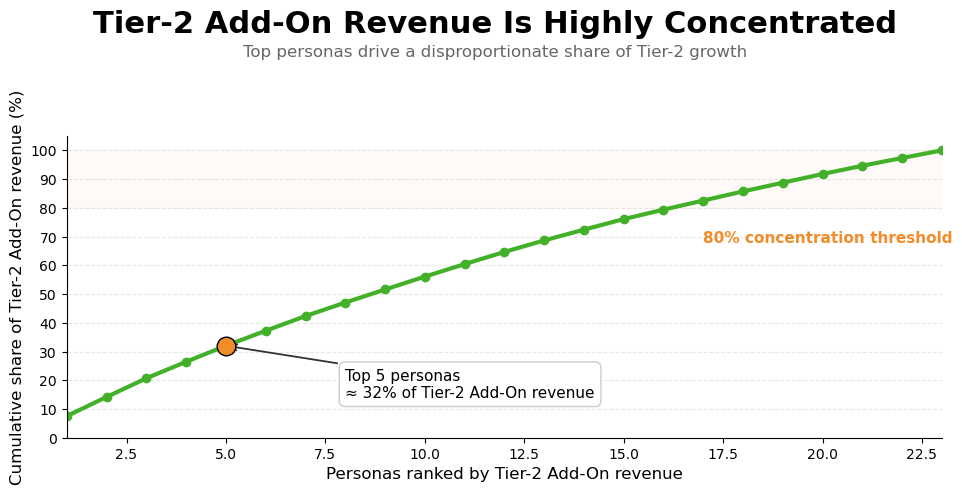

In [77]:
# Build chart 6
# Instacart colors
IC_GREEN = "#43B02A"
IC_ORANGE = "#F28C28"
GRID_GRAY = "#D9D9D9"

top_n = 5

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(
    pareto_t2["persona_rank"],
    pareto_t2["cumulative_share_pct"],
    marker="o",
    linewidth=3,
    markersize=6,
    color=IC_GREEN)

ax.grid(axis="y", linestyle="--", linewidth=0.8, alpha=0.6, color=GRID_GRAY)
ax.grid(axis="x", visible=False)

# 80% band
ax.axhspan(80, 100, color=IC_ORANGE, alpha=0.035)
xmax = pareto_t2["persona_rank"].max()
ax.text(xmax - 6, 68, "80% concentration threshold", ha="left", fontsize=11, color=IC_ORANGE, weight="bold")

# Highlight top N point
topN_cum = pareto_t2.loc[pareto_t2["persona_rank"] == top_n, "cumulative_share_pct"].iloc[0]
ax.scatter(top_n, topN_cum, s=180, color=IC_ORANGE, edgecolor="black", zorder=5)

ax.annotate(
    "Top 5 personas\n≈ 32% of Tier-2 Add-On revenue",
    xy=(top_n, topN_cum),
    xytext=(top_n + 3, topN_cum - 18),
    arrowprops=dict(arrowstyle="->", lw=1.3, color="#333333"),
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#CCCCCC"),
    fontsize=11,
    ha="left")

ax.set_xlabel("Personas ranked by Tier-2 Add-On revenue", fontsize=12)
ax.set_ylabel("Cumulative share of Tier-2 Add-On revenue (%)", fontsize=12)
ax.set_ylim(0, 105)
ax.set_xlim(1, xmax)
ax.set_yticks(range(0, 101, 10))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.suptitle("Tier-2 Add-On Revenue Is Highly Concentrated", fontsize=22, weight="bold", y=0.975)
fig.text(0.5, 0.88, "Top personas drive a disproportionate share of Tier-2 growth", ha="center", fontsize=12, color="#666666")

plt.tight_layout(rect=[0, 0, 1, 0.84])

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

_Chart 6 – Tier-2 Add-On Growth Concentration_

Tier-2 Add-On revenue is highly concentrated across a small number of customer personas.  
The top 5 personas account for approximately **32% of total Tier-2 Add-On revenue**, indicating that incremental growth is driven disproportionately by a narrow segment of high-value customers.  

This concentration highlights both a leverage opportunity (focused growth investment) and a risk exposure (dependency on a limited customer base).

**Chart 7: Tier-2 Core vs Add-On Split**

Using a lollipop chart.

In [78]:
# Define what counts as Add-On
ADDON_DEPARTMENTS = [
    "snacks",
    "beverages",
    "breakfast",
    "dry goods pasta",
    "canned goods",
    "frozen"]

In [79]:
# Filter to Tier-2 rows
tier2_df = df_cfo[df_cfo["marketing_priority"] == "Tier 2 – Growth Opportunity"].copy()

In [80]:
# Classify Core vs Add-On
tier2_df["tier2_mix"] = np.where(
    tier2_df["department"].isin(ADDON_DEPARTMENTS),
    "Add-On",
    "Core Food")

In [81]:
# Build clean revenue mix table
viz_tier2_mix = (
    tier2_df
    .groupby("tier2_mix", as_index=False)
    .agg(total_revenue=("prices", "sum")))

viz_tier2_mix["revenue_share_pct"] = (
    viz_tier2_mix["total_revenue"] / viz_tier2_mix["total_revenue"].sum() * 100).round(2)



In [82]:
# Check
viz_tier2_mix

,tier2_mix,total_revenue,revenue_share_pct
0,Add-On,27671328.4,37.5
1,Core Food,46113135.8,62.5


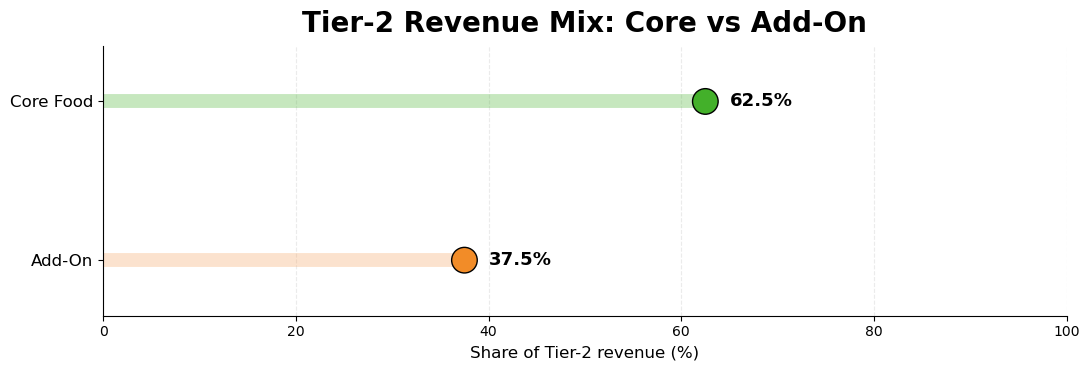

In [83]:
# Create lollipop chart for chart 7

# Display (Core on top)
viz = viz_tier2_mix.copy()
viz["tier2_mix"] = pd.Categorical(viz["tier2_mix"], categories=["Core Food", "Add-On"], ordered=True)
viz = viz.sort_values("tier2_mix").reset_index(drop=True)

labels = viz["tier2_mix"].tolist()
vals = viz["revenue_share_pct"].tolist()

# Spacing
ypos = [1, 0]  # Core Food on top, Add-On on bottom

fig, ax = plt.subplots(figsize=(11, 3.8))  # <-- smaller height fixes the giant empty space

# Lollipop stems
ax.hlines(
    y=ypos,
    xmin=0,
    xmax=vals,
    color=["#43B02A", "#F5A25D"],   # green for Core, light orange for Add-On
    alpha=0.30,
    linewidth=10)

# Lollipop heads
ax.scatter(
    vals,
    ypos,
    s=340,
    color=["#43B02A", "#F28C28"],
    edgecolors="black",
    zorder=3)

# Value labels (clean + consistent)
for x, y in zip(vals, ypos):
    ax.text(x + 2.5, y, f"{x:.1f}%", va="center", fontsize=13, weight="bold")

# Axes + styling
ax.set_yticks(ypos)
ax.set_yticklabels(["Core Food", "Add-On"], fontsize=12)
ax.set_xlim(0, 100)
ax.set_ylim(-0.35, 1.35)  # <-- trims extra vertical padding
ax.set_xlabel("Share of Tier-2 revenue (%)", fontsize=12)

ax.set_title("Tier-2 Revenue Mix: Core vs Add-On", fontsize=20, weight="bold", pad=10)
ax.grid(axis="x", linestyle="--", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

Tier-2 revenue is still anchored in Core Food categories, which account for ~62.5% of Tier-2 sales. However, Add-On products already contribute a substantial 37.5% of Tier-2 revenue, signaling that Tier-2 is the primary expansion layer where customers begin meaningfully extending baskets beyond essential grocery staples.

This confirms Tier-2 as Instacart’s growth bridge — where core grocery demand is still strong, but cross-sell and incremental add-on behavior is actively scaling.

**Chart 8: Pofile Distribution by Frequency (Top 12 Personas + "Others")**

In [84]:
# Build frequency base
freq_base = (
    df_cfo
    .groupby("compound_persona")
    .size()
    .reset_index(name="order_lines"))

freq_base["share_pct"] = (freq_base["order_lines"] / freq_base["order_lines"].sum() * 100).round(2)

In [85]:
# Top 12 + Others
top_n = 12
freq_top = freq_base.sort_values("share_pct", ascending=False).head(top_n)
other_share = freq_base.sort_values("share_pct", ascending=False).iloc[top_n:]["share_pct"].sum()

freq_other = pd.DataFrame({
    "compound_persona": ["Other personas"],
    "share_pct": [round(other_share,2)]})

plot_freq = pd.concat([freq_top, freq_other], ignore_index=True)
plot_freq

,compound_persona,order_lines,share_pct
0,Older Adult | Family | High Income | Health-Fo...,2839558.0,9.16
1,Older Adult | Family | Middle Income | Health-...,2732286.0,8.82
2,Middle-Aged Adult | Family | Middle Income | H...,1551410.0,5.01
3,Young Adult | Family | Middle Income | Health-...,1377661.0,4.45
4,Older Adult | Single | High Income | Health-Fo...,966056.0,3.12
5,Older Adult | Family | High Income | Snack & B...,953930.0,3.08
6,Older Adult | Family | Middle Income | Snack &...,914499.0,2.95
7,Older Adult | Single | Middle Income | Health-...,905641.0,2.92
8,Older Adult | Family | High Income | Family St...,783807.0,2.53
9,Older Adult | Family | High Income | Mixed / O...,774972.0,2.50


In [86]:
# Clean labels
def clean_label(s):
    if s=="Other personas":
        return s
    parts = [p.strip() for p in s.split("|")]
    age = parts[0] if len(parts)>0 else ""
    fam = parts[1] if len(parts)>1 else ""
    shopper = parts[-1].replace(" Shopper","") if parts else ""
    return f"{age} • {fam} • {shopper}"

plot_freq["label_clean"] = plot_freq["compound_persona"].apply(clean_label)

In [87]:
# Create chart 8: Profile Distribution by Frequency (Personas)
# Instacart Colors
IC_GREEN   = "#43B02A"
GRID_GRAY  = "#D9D9D9"
OTHER_GRAY = "#BDBDBD"
TEXT_GRAY  = "#222222"

In [88]:
# Rebuild Frequency distribution from df_cfo (order-line level)
freq_base = (
    df_cfo
    .groupby("compound_persona", dropna=False)
    .size()
    .reset_index(name="order_lines"))

freq_base["share_pct"] = (freq_base["order_lines"] / freq_base["order_lines"].sum() * 100).round(2)

In [89]:
# Top 12 + "Other personas"
top_n = 12
freq_top = freq_base.sort_values("share_pct", ascending=False).head(top_n).copy()

other_share = freq_base.sort_values("share_pct", ascending=False).iloc[top_n:]["share_pct"].sum()
freq_other = pd.DataFrame({"compound_persona": ["Other personas"], "share_pct": [round(other_share, 2)]})

plot_freq = pd.concat([freq_top, freq_other], ignore_index=True)

In [90]:
# Force ordering: biggest first, and "Other personas" LAST (bottom)
df_top = plot_freq[plot_freq["compound_persona"] != "Other personas"].copy().sort_values("share_pct", ascending=False)
df_other = plot_freq[plot_freq["compound_persona"] == "Other personas"].copy()
plot_freq_clean = pd.concat([df_top, df_other], ignore_index=True)

In [91]:
# Clean labels
def clean_label(s):
    if s == "Other personas":
        return s
    parts = [p.strip() for p in s.split("|")]
    age = parts[0] if len(parts) > 0 else ""
    fam = parts[1] if len(parts) > 1 else ""
    shopper = parts[3] if len(parts) > 3 else (parts[-1] if parts else "")
    shopper = shopper.replace(" Shopper", "").strip()
    return f"{age} • {fam} • {shopper}"

plot_freq_clean["label_clean"] = plot_freq_clean["compound_persona"].apply(clean_label)

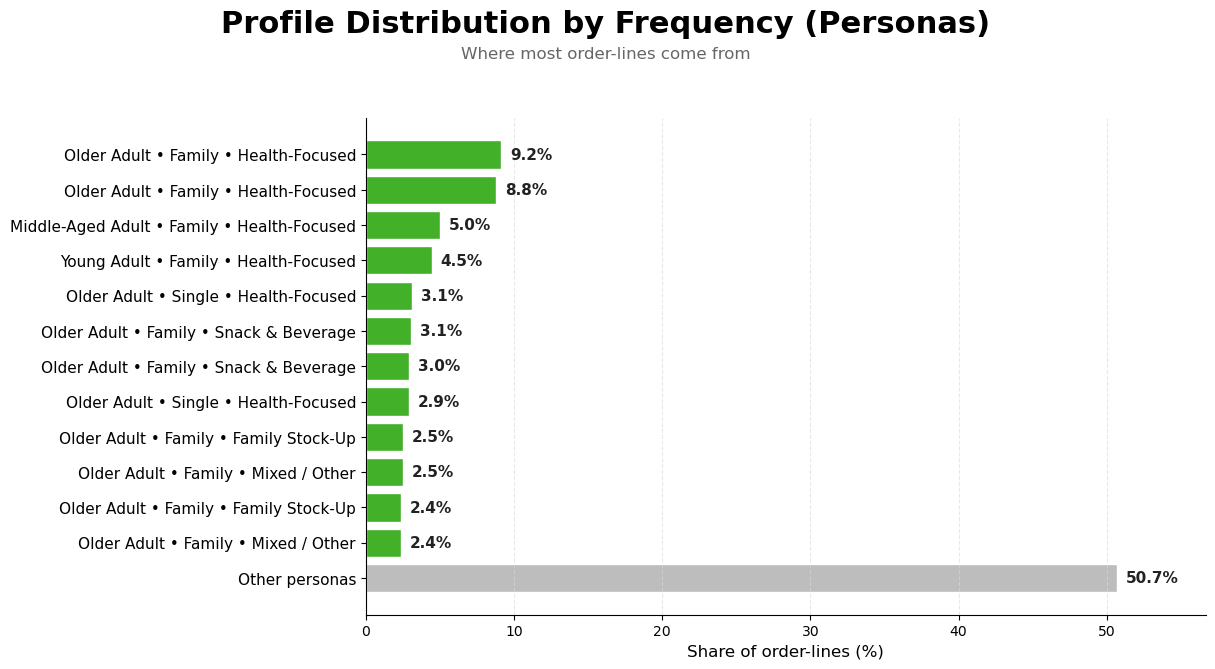

In [92]:
# Plot chart 8
y = np.arange(len(plot_freq_clean))
vals = plot_freq_clean["share_pct"].values
colors = [OTHER_GRAY if p == "Other personas" else IC_GREEN for p in plot_freq_clean["compound_persona"]]

fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.barh(y, vals, color=colors, edgecolor="white")

ax.set_yticks(y)
ax.set_yticklabels(plot_freq_clean["label_clean"], fontsize=11)

for bar, v in zip(bars, vals):
    ax.text(v + 0.6,
            bar.get_y() + bar.get_height()/2,
            f"{v:.1f}%",
            va="center", ha="left",
            fontsize=11, weight="bold",
            color=TEXT_GRAY)

ax.set_xlim(0, max(55, vals.max() + 6))
ax.set_xlabel("Share of order-lines (%)", fontsize=12)
ax.set_ylabel("")
ax.grid(axis="x", linestyle="--", linewidth=0.8, alpha=0.6, color=GRID_GRAY)
ax.grid(axis="y", visible=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.suptitle("Profile Distribution by Frequency (Personas)", fontsize=22, weight="bold", y=0.975)
fig.text(0.5, 0.905, "Where most order-lines come from",
         ha="center", fontsize=12, color="#666666")

fig.subplots_adjust(left=0.34, top=0.82)
ax.invert_yaxis()

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

Chart 8: This chart shows how overall shopping activity (order-lines) is distributed across customer personas.
A small number of health-focused family personas — particularly Older Adult Family Health-Focused shoppers — generate a disproportionate share of total shopping frequency, while over half of all remaining activity is spread across a long tail of smaller personas (“Other personas”).

**Chart 9: Profile Distribution by Revenue (Personas)**

In [93]:
# Create chart with same layout as By Frequency chart
# Instacart colors
# Colors (same style as Chart 8)
IC_GREEN   = "#43B02A"
GRID_GRAY  = "#D9D9D9"
OTHER_GRAY = "#BDBDBD"
TEXT_GRAY  = "#222222"

# Pick the base dataset
if "df_cfo" in globals():
    _base = df_cfo.copy()
elif "df_safe" in globals():
    _base = df_safe.copy()
else:
    raise NameError("I can't find df_cfo or df_safe in memory. Run the cell where you create df_cfo (or df_safe) first.")

In [94]:
#  Make sure compound_persona exists
if "compound_persona" not in _base.columns:
    raise KeyError(f"'compound_persona' not found. Available columns: {list(_base.columns)[:40]} ...")

In [95]:
#  Auto-detect a revenue/spend column
candidate_rev_cols = []
for c in _base.columns:
    cl = c.lower()
    if any(k in cl for k in ["revenue", "sales", "spend", "total", "price"]):
        candidate_rev_cols.append(c)

In [96]:
# keep only numeric candidates
candidate_rev_cols = [c for c in candidate_rev_cols if pd.api.types.is_numeric_dtype(_base[c])]

if len(candidate_rev_cols) == 0:
    numeric_cols = [c for c in _base.columns if pd.api.types.is_numeric_dtype(_base[c])]
    raise ValueError(
        "Could not auto-detect a revenue column. "
        "Tell me which column represents revenue (often 'price').\n\n"
        f"Numeric columns I CAN use:\n{numeric_cols}")

In [97]:
# choose the best-looking candidate by priority
priority = ["revenue", "sales", "spend", "price"]
def _score(col):
    cl = col.lower()
    for i, k in enumerate(priority):
        if k in cl:
            return i
    return 999

rev_value_col = sorted(candidate_rev_cols, key=_score)[0]

In [98]:
# Build revenue share by persona 
plot_rev = (
    _base.groupby("compound_persona", as_index=False)[rev_value_col]
        .sum()
        .rename(columns={rev_value_col: "revenue_value"}))

plot_rev["revenue_share_pct"] = (plot_rev["revenue_value"] / plot_rev["revenue_value"].sum()) * 100

In [99]:
# Top 12 + "Other personas" bucket
plot_rev = plot_rev.sort_values("revenue_share_pct", ascending=False).reset_index(drop=True)

top_n = 12
rev_top = plot_rev.head(top_n).copy()
rev_other = plot_rev.iloc[top_n:].copy()

other_row = pd.DataFrame({
    "compound_persona": ["Other personas"],
    "revenue_value": [rev_other["revenue_value"].sum()],
    "revenue_share_pct": [rev_other["revenue_share_pct"].sum()]})

plot_rev_clean = pd.concat([rev_top, other_row], ignore_index=True)

In [100]:
# Clean labels (same as Chart 8)
def clean_label(s):
    if s == "Other personas":
        return s
    parts = [p.strip() for p in s.split("|")]
    age = parts[0] if len(parts) > 0 else ""
    fam = parts[1] if len(parts) > 1 else ""
    shopper = parts[3] if len(parts) > 3 else (parts[-1] if parts else "")
    shopper = shopper.replace(" Shopper", "").strip()
    return f"{age} • {fam} • {shopper}"

plot_rev_clean["label_clean"] = plot_rev_clean["compound_persona"].apply(clean_label)

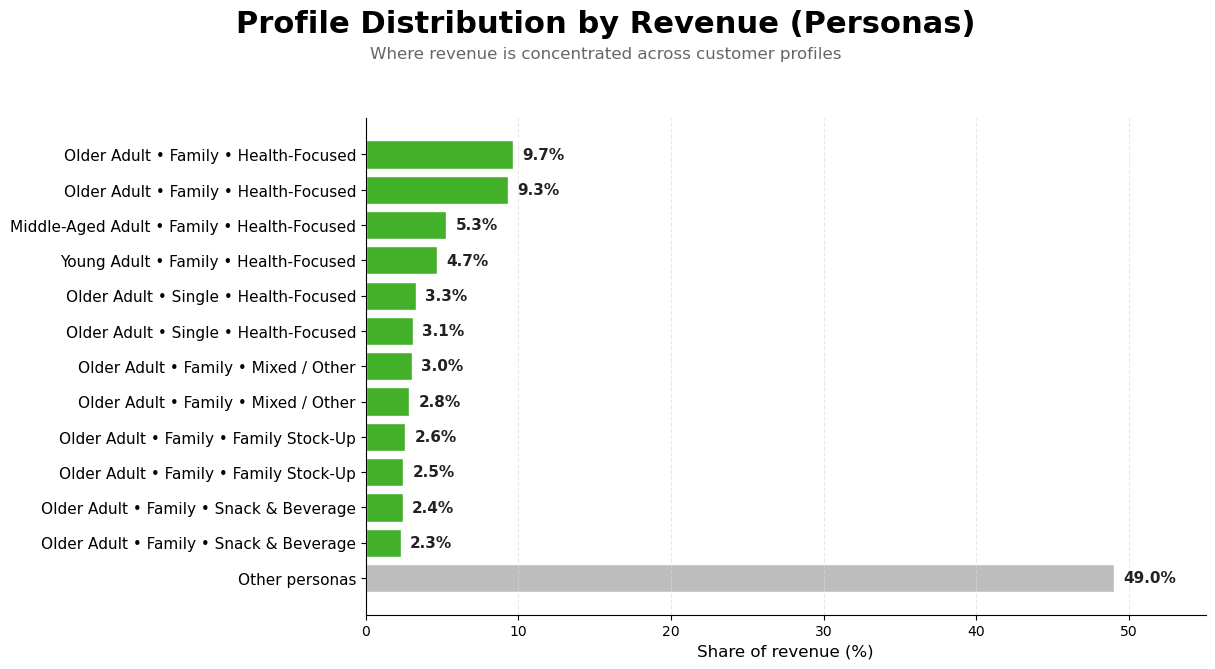

In [101]:
# Plot chart 9 (Chart 8 layout)
y = np.arange(len(plot_rev_clean))
vals = plot_rev_clean["revenue_share_pct"].values

colors = [OTHER_GRAY if p == "Other personas" else IC_GREEN for p in plot_rev_clean["compound_persona"]]

fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.barh(y, vals, color=colors, edgecolor="white")

ax.set_yticks(y)
ax.set_yticklabels(plot_rev_clean["label_clean"], fontsize=11)

for bar, v in zip(bars, vals):
    ax.text(
        v + 0.6,
        bar.get_y() + bar.get_height()/2,
        f"{v:.1f}%",
        va="center",
        ha="left",
        fontsize=11,
        weight="bold",
        color=TEXT_GRAY)

ax.set_xlim(0, max(55, vals.max() + 6))
ax.set_xlabel("Share of revenue (%)", fontsize=12)
ax.set_ylabel("")

ax.grid(axis="x", linestyle="--", linewidth=0.8, alpha=0.6, color=GRID_GRAY)
ax.grid(axis="y", visible=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.suptitle("Profile Distribution by Revenue (Personas)", fontsize=22, weight="bold", y=0.975)
fig.text(0.5, 0.905, "Where revenue is concentrated across customer profiles",
         ha="center", fontsize=12, color="#666666")

fig.subplots_adjust(left=0.34, top=0.82)

# Put "Other personas" visually at the bottom (same as your Chart 8 final)
ax.invert_yaxis()

#Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

In [102]:
print(f"Chart 9 built using revenue column: {rev_value_col}")

Chart 9 built using revenue column: prices


Chart 9: This chart shows how total revenue is distributed across customer personas.
Revenue is even more concentrated than shopping frequency: a small cluster of Older Adult, Family, Health-Focused personas drives the largest share of revenue, while nearly half of total revenue is generated by a broad long-tail of smaller customer profiles.

**Chart 10: Family vs Single — Frequency vs Revenue Share**

Using dumbbell chart to show share of order-lines (frequency) vs share of revenue side by side.

In [103]:
# Create dumbbell chart 10
# Instacart Colors
IC_GREEN  = "#43B02A"   # Frequency
IC_ORANGE = "#F28C28"   # Revenue
GRID_GRAY = "#D9D9D9"
TEXT_GRAY = "#222222"

In [104]:
# Build Chart 10 data
# Frequency = share of rows (order-lines)
chart10_freq = (
    df_cfo["family_status"]
    .value_counts(dropna=False)
    .rename_axis("family_status")
    .reset_index(name="order_lines"))

chart10_freq["freq_share_pct"] = (chart10_freq["order_lines"] / chart10_freq["order_lines"].sum()) * 100

In [105]:
# Revenue = share of total prices
chart10_rev = (
    df_cfo.groupby("family_status", dropna=False)["prices"]
    .sum()
    .reset_index(name="revenue"))

chart10_rev["rev_share_pct"] = (chart10_rev["revenue"] / chart10_rev["revenue"].sum()) * 100

In [106]:
# Merge into one table
chart10_df = chart10_freq.merge(chart10_rev, on="family_status", how="inner")

In [107]:
# Keep only Family / Single
chart10_order = ["Single", "Family"]
chart10_df = chart10_df[chart10_df["family_status"].isin(chart10_order)].copy()
chart10_df["family_status"] = pd.Categorical(chart10_df["family_status"], categories=chart10_order, ordered=True)
chart10_df = chart10_df.sort_values("family_status")

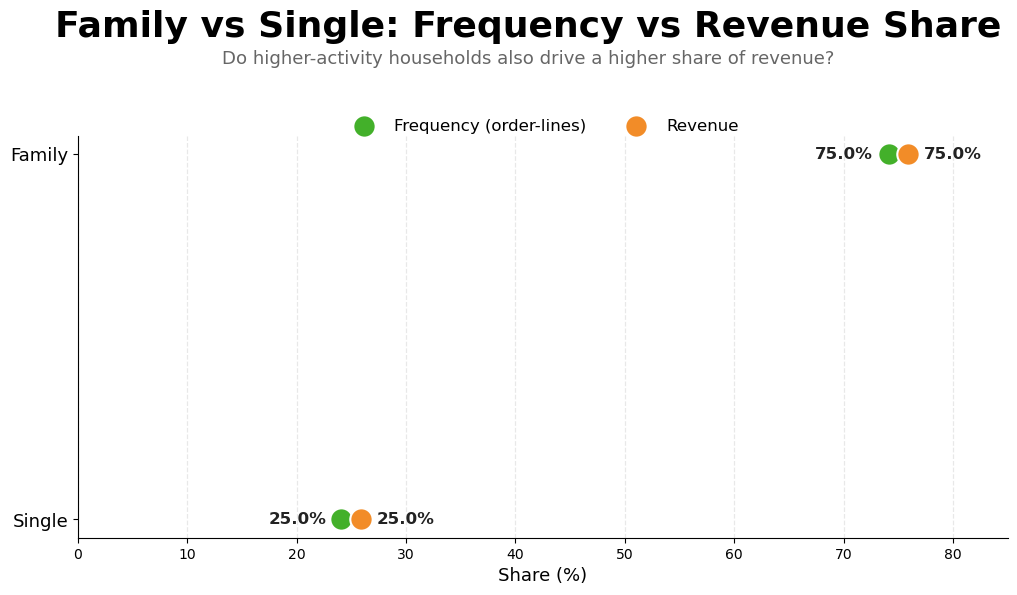

In [109]:
# Plot dumbbell chart 10
fig, ax = plt.subplots(figsize=(12, 6))

y = np.arange(len(chart10_df))
x_freq = chart10_df["freq_share_pct"].to_numpy()
x_rev  = chart10_df["rev_share_pct"].to_numpy()

for yi, xf, xr in zip(y, x_freq, x_rev):
    ax.plot([xf, xr], [yi, yi], linewidth=4, alpha=0.25, color="#666666", zorder=1)

# points
offset = 0.9

sc_freq = ax.scatter(x_freq - offset, y, s=260, color=IC_GREEN,
                     edgecolor="white", linewidth=1.5,
                     label="Frequency (order-lines)", zorder=3)

sc_rev  = ax.scatter(x_rev + offset,  y, s=260, color=IC_ORANGE,
                     edgecolor="white", linewidth=1.5,
                     label="Revenue", zorder=4)

# value labels
for yi, xf in zip(y, x_freq):
    ax.text(xf - offset - 1.4, yi, f"{xf:.1f}%", va="center", ha="right",
            fontsize=12, weight="bold", color=TEXT_GRAY)

for yi, xr in zip(y, x_rev):
    ax.text(xr + offset + 1.4, yi, f"{xr:.1f}%", va="center", ha="left",
            fontsize=12, weight="bold", color=TEXT_GRAY)

# Axes + styling
ax.set_yticks(y)
ax.set_yticklabels(chart10_df["family_status"], fontsize=13)

ax.set_xlabel("Share (%)", fontsize=13)
ax.set_xlim(0, max(85, float(np.nanmax([x_freq.max(), x_rev.max()])) + 10))

ax.grid(axis="x", linestyle="--", linewidth=0.9, alpha=0.6, color=GRID_GRAY)
ax.grid(axis="y", visible=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Header spacing 
fig.suptitle("Family vs Single: Frequency vs Revenue Share", fontsize=26, weight="bold", y=0.99)
fig.text(0.5, 0.9, "Do higher-activity households also drive a higher share of revenue?",
         ha="center", fontsize=13, color="#666666")

# Legend
leg = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.08), ncol=2, frameon=False, fontsize=12)

# Layout
fig.subplots_adjust(top=0.78)

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")

In [110]:
# Check
print("Chart 10 table:")
display(chart10_df[["family_status", "freq_share_pct", "rev_share_pct"]])

Chart 10 table:


,family_status,freq_share_pct,rev_share_pct
1,Single,24.996163,24.992095
0,Family,75.003837,75.007905


Chart 10: Family vs Single: Frequency vs Revenue Share

This chart compares the share of total order-lines (purchase frequency) with the share of total revenue generated by Family and Single households.

Family households account for approximately 75% of all order-lines and 75% of total revenue, indicating that higher purchasing frequency among families directly translates into proportional revenue contribution. Single households represent the remaining ~25% of both frequency and revenue.

This alignment shows that Tier-1 revenue is not being disproportionately driven by one household type relative to its activity level — revenue scales directly with purchasing volume. As a result, growth strategies targeting high-frequency Family households are expected to deliver predictable and stable revenue returns rather than relying on outsized basket value effects.

**Chart 11: Revenue Efficiency by Persona**

Revenue effiency index = revenue share/frequency share. Index >1 = high-value persona (spends more per activity).

In [111]:
# Build Chart 11 Efficiency Table 
# Frequency share by persona
freq_tbl = (
    df_cfo
    .groupby("compound_persona")
    .size()
    .reset_index(name="order_lines"))
freq_tbl["freq_share_pct"] = freq_tbl["order_lines"] / freq_tbl["order_lines"].sum() * 100

In [112]:
# Revenue share by persona
rev_tbl = (
    df_cfo
    .groupby("compound_persona")["prices"]
    .sum()
    .reset_index(name="revenue"))
rev_tbl["rev_share_pct"] = rev_tbl["revenue"] / rev_tbl["revenue"].sum() * 100

In [113]:
# Merge efficiency index
efficiency_df = freq_tbl.merge(rev_tbl, on="compound_persona", how="inner")

In [114]:
# Computer efficiency index
efficiency_df["efficiency_index"] = efficiency_df["rev_share_pct"] / efficiency_df["freq_share_pct"]

In [115]:
# Keep Top 12 personas by revenue
top_personas = rev_tbl.sort_values("revenue", ascending=False).head(12)["compound_persona"]
efficiency_df = efficiency_df[efficiency_df["compound_persona"].isin(top_personas)]

In [116]:
# Check
print("efficiency_df exists:", "efficiency_df" in globals())
efficiency_df.head()

efficiency_df exists: True


,compound_persona,order_lines,freq_share_pct,revenue,rev_share_pct,efficiency_index
16,Middle-Aged Adult | Family | Middle Income | H...,1551410,5.005600,12740600.4,5.282298,1.055278
43,Older Adult | Family | High Income | Family St...,783807,2.528941,6221224.2,2.579341,1.019930
44,Older Adult | Family | High Income | Health-Fo...,2839558,9.161789,23321788.2,9.669295,1.055394
46,Older Adult | Family | High Income | Mixed / O...,774972,2.500435,7263759.7,3.011580,1.204423
47,Older Adult | Family | High Income | Snack & B...,953930,3.077840,5849543.3,2.425241,0.787969


In [117]:
# Chart 11 setup (rebuild plot_df every time so kernel restarts don't break the chart)
plot_df = efficiency_df.copy()

if "label_clean" not in plot_df.columns:
    plot_df["label_clean"] = plot_df["compound_persona"].astype(str)
    plot_df = plot_df.sort_values("efficiency_index", ascending=False)

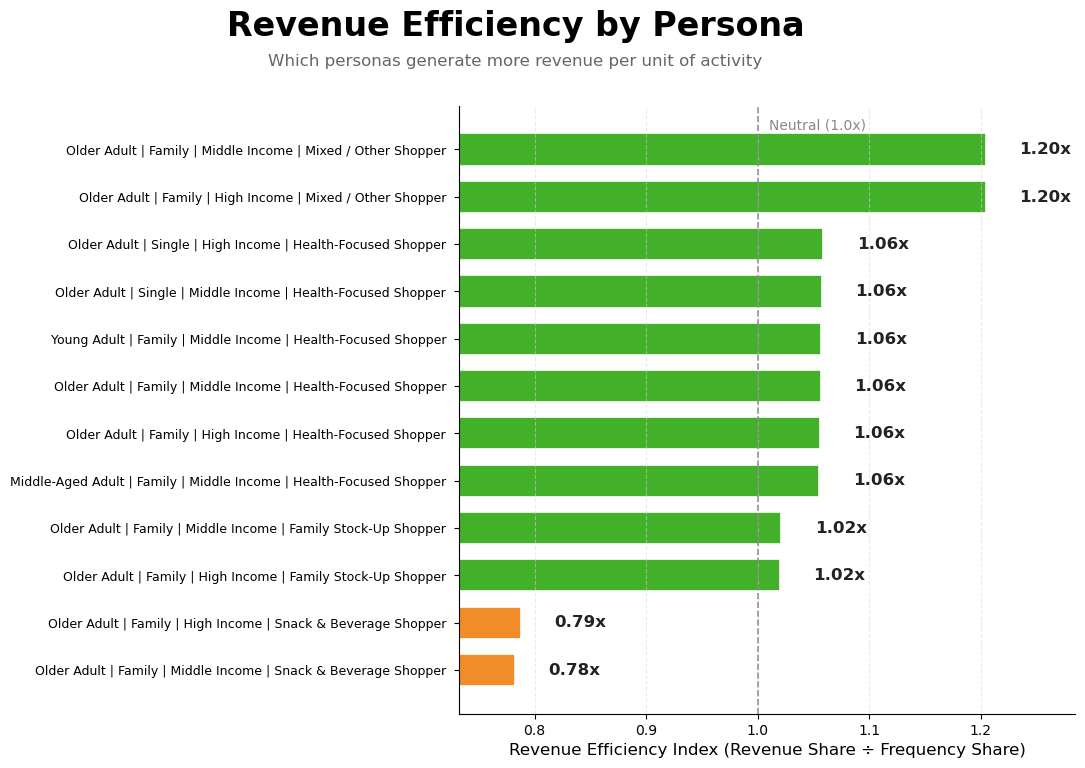

In [118]:
# Chart 11: Revenue Efficiency by Persona
fig, ax = plt.subplots(figsize=(14, 8))

# Colors: green if >=1, orange if <1
colors = [IC_GREEN if v >= 1 else IC_ORANGE for v in plot_df["efficiency_index"]]

# Bars
bars = ax.barh(
    plot_df["label_clean"],
    plot_df["efficiency_index"],
    color=colors,
    edgecolor="white",
    linewidth=1.2,
    height=0.68)

# Neutral line at 1.0x
ax.axvline(1.0, linestyle="--", linewidth=1.2, color="#888888", alpha=0.9)

ax.text(
    1.01, 0.98, "Neutral (1.0x)",
    transform=ax.get_xaxis_transform(),  
    color="#888888", fontsize=10, va="top"); 

# Value labels like "1.20x"
for bar, v in zip(bars, plot_df["efficiency_index"]):
    ax.text(
        v + 0.03,
        bar.get_y() + bar.get_height() / 2,
        f"{v:.2f}x",
        va="center", ha="left",
        fontsize=12, weight="bold", color=TEXT_GRAY)

# Axis styling
ax.set_xlabel("Revenue Efficiency Index (Revenue Share ÷ Frequency Share)", fontsize=12)
ax.grid(axis="x", linestyle="--", linewidth=0.8, alpha=0.5, color=GRID_GRAY)
ax.grid(axis="y", visible=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis="y", labelsize=9, pad=6)

xmin = min(0.75, float(plot_df["efficiency_index"].min()) - 0.05)
xmax = max(1.25, float(plot_df["efficiency_index"].max()) + 0.08)
ax.set_xlim(xmin, xmax)

ax.invert_yaxis()

# Title + subtitle
fig.suptitle("Revenue Efficiency by Persona", fontsize=24, weight="bold", y=0.99)
fig.text(
    0.5, 0.92,
    "Which personas generate more revenue per unit of activity",
    ha="center", fontsize=12, color="#666666")

# Give room for titles + long labels
fig.subplots_adjust(left=0.46, top=0.87)

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

In [119]:
# Check
display(plot_df[["compound_persona", "freq_share_pct", "rev_share_pct", "efficiency_index"]])

,compound_persona,freq_share_pct,rev_share_pct,efficiency_index
60,Older Adult | Family | Middle Income | Mixed /...,2.365584,2.849651,1.204629
46,Older Adult | Family | High Income | Mixed / O...,2.500435,3.011580,1.204423
65,Older Adult | Single | High Income | Health-Fo...,3.116964,3.300208,1.058789
79,Older Adult | Single | Middle Income | Health-...,2.922036,3.090418,1.057625
100,Young Adult | Family | Middle Income | Health-...,4.445001,4.697831,1.056880
58,Older Adult | Family | Middle Income | Health-...,8.815677,9.314263,1.056557
44,Older Adult | Family | High Income | Health-Fo...,9.161789,9.669295,1.055394
16,Middle-Aged Adult | Family | Middle Income | H...,5.005600,5.282298,1.055278
57,Older Adult | Family | Middle Income | Family ...,2.404440,2.454832,1.020958
43,Older Adult | Family | High Income | Family St...,2.528941,2.579341,1.019930


This chart compares each persona’s share of revenue to their share of activity (order-lines).
Personas with an efficiency index above 1.0 generate more revenue per unit of activity than average, while those below 1.0 underperform.
High-income, family-oriented and health-focused personas are the most efficient revenue drivers, whereas snack-focused personas contribute disproportionately less revenue relative to their activity level.

Chart 12: Regional Revenue & Frequency Concentration

Stop regions by revenue and "Other".

In [120]:
# Build regional base table
region_base = (df_cfo
    .groupby("region")
    .agg(
        order_lines=("user_id", "count"),
        revenue=("prices", "sum"))
    .reset_index())

In [121]:
# Create chart 12
# Instacart colors
region_base["freq_share_pct"] = region_base["order_lines"] / region_base["order_lines"].sum() * 100
region_base["rev_share_pct"]  = region_base["revenue"] / region_base["revenue"].sum() * 100

In [122]:
# Top regions + Other
chart12_df = region_base.sort_values("rev_share_pct", ascending=False)

In [123]:
# Plot prep
y = np.arange(len(chart12_df))
freq_vals = chart12_df["freq_share_pct"].values
rev_vals  = chart12_df["rev_share_pct"].values

colors = [OTHER_GRAY if r == "Other regions" else IC_GREEN for r in chart12_df["region"]]

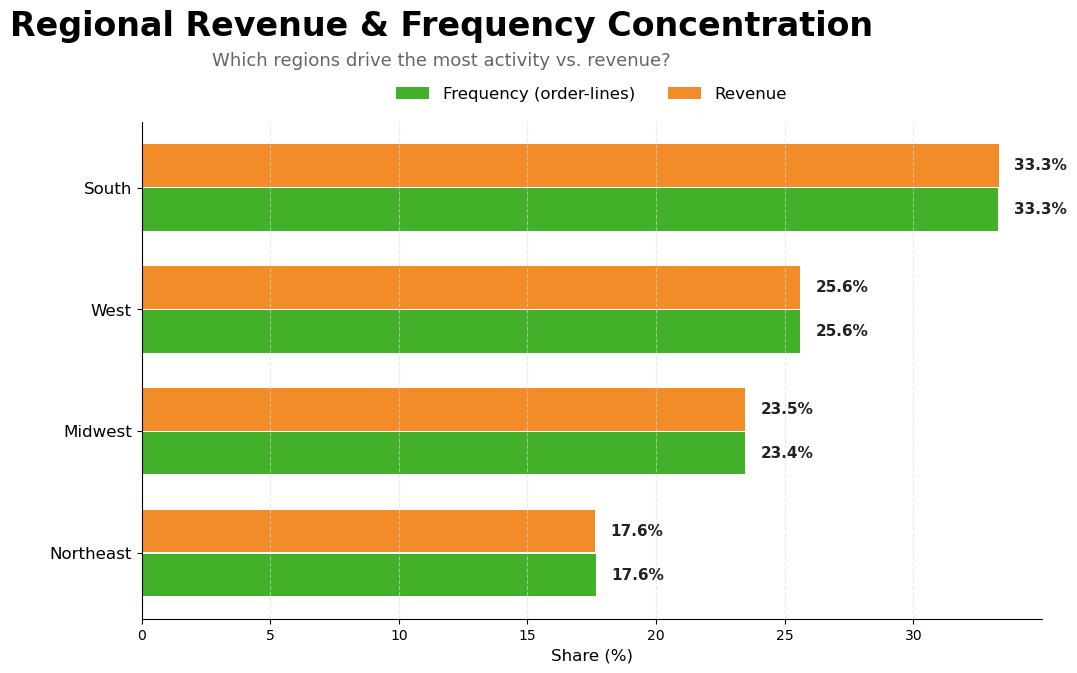

In [125]:
# Plot 
fig, ax = plt.subplots(figsize=(15, 7))

ax.barh(y + 0.18, freq_vals, height=0.35, color=colors, label="Frequency (order-lines)")
ax.barh(y - 0.18, rev_vals, height=0.35, color=IC_ORANGE, label="Revenue")

ax.set_yticks(y)
ax.set_yticklabels(chart12_df["region"], fontsize=12)

# Value labels
for i, (f, r) in enumerate(zip(freq_vals, rev_vals)):
    ax.text(f + 0.6, i + 0.18, f"{f:.1f}%", va="center", fontsize=11, weight="bold", color=TEXT_GRAY)
    ax.text(r + 0.6, i - 0.18, f"{r:.1f}%", va="center", fontsize=11, weight="bold", color=TEXT_GRAY)

# Axes + grid
ax.set_xlabel("Share (%)", fontsize=12)
ax.grid(axis="x", linestyle="--", linewidth=0.8, alpha=0.6, color=GRID_GRAY)
ax.grid(axis="y", visible=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Title
fig.suptitle("Regional Revenue & Frequency Concentration", fontsize=24, weight="bold", y=0.98)
fig.text(0.5, 0.90, "Which regions drive the most activity vs. revenue?",
         ha="center", fontsize=13, color="#666666")

fig.subplots_adjust(left=0.30, top=0.82)
ax.invert_yaxis()

# legend
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    frameon=False,
    fontsize=12)

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

In [126]:
# Check
display(chart12_df)

,region,order_lines,revenue,freq_share_pct,rev_share_pct
2,South,10320831,80356358.3,33.299997,33.316029
3,West,7934592,61746425.9,25.600835,25.600286
0,Midwest,7267902,56574626.9,23.449770,23.456039
1,Northeast,5470164,42516874.7,17.649397,17.627646


Chart 12: Order volume and revenue are closely aligned across all regions, indicating that regional performance is driven by scale rather than differences in spending behavior.
The South leads both activity and revenue share, followed by the West and Midwest, while the Northeast contributes the smallest share.
Regional differences are primarily volume-driven, not mix-driven.

**Chart 13: Regional Department Mix**

What each region actually buys.

In [127]:
# CHART 13 — Regional Department Mix (Revenue Share)
# Pick dataset
chart13 = (df_cfo
    .groupby(["region", "department"])["prices"]
    .sum()
    .reset_index(name="dept_revenue"))

In [128]:
# Total revenue per region
chart13["region_total"] = chart13.groupby("region")["dept_revenue"].transform("sum")
chart13["rev_share_pct"] = (chart13["dept_revenue"] / chart13["region_total"]) * 100

In [129]:
# Top 10 depts overall
top_depts = (
    chart13.groupby("department")["dept_revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist())

chart13["dept_bucket"] = np.where(chart13["department"].isin(top_depts), chart13["department"], "Other depts")

chart13_final = (chart13.groupby(["region", "dept_bucket"])["rev_share_pct"].sum().reset_index())

chart13_pivot = (chart13_final.pivot(index="region", columns="dept_bucket", values="rev_share_pct").fillna(0))

chart13_pivot = chart13_pivot[top_depts + ["Other depts"]]

In [130]:
# Check
display(chart13_pivot.round(2))

dept_bucket,produce,dairy eggs,beverages,frozen,pantry,snacks,meat seafood,bakery,deli,canned goods,Other depts
region,,,,,,,,,,,
Midwest,30.11,17.85,8.14,6.80,5.95,4.88,4.55,3.64,3.24,3.17,11.68
Northeast,29.89,17.93,8.37,6.74,5.89,4.95,4.54,3.69,3.26,3.13,11.62
South,30.07,17.84,8.22,6.84,5.90,4.88,4.55,3.63,3.23,3.17,11.65
West,30.04,17.92,8.08,6.80,5.95,4.93,4.59,3.67,3.24,3.18,11.61


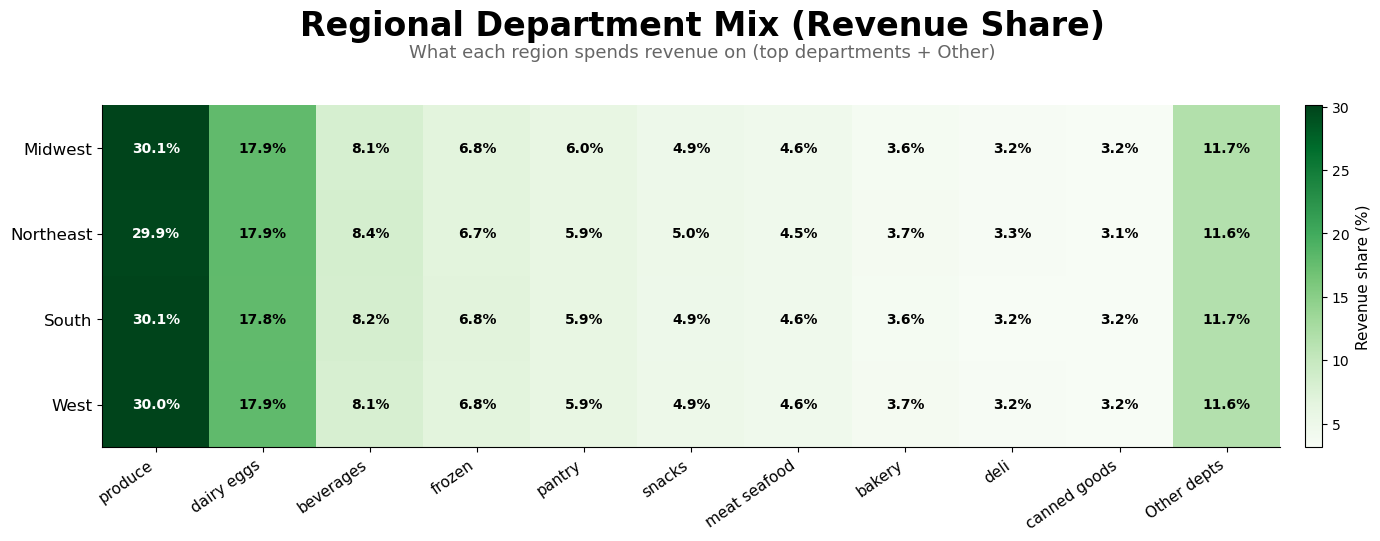

In [131]:
# Create chart 13
fig, ax = plt.subplots(figsize=(16, 6))

# Range
vmin = float(np.nanmin(chart13_pivot.values))
vmax = float(np.nanmax(chart13_pivot.values))

im = ax.imshow(chart13_pivot.values, aspect="auto", cmap="Greens", vmin=vmin, vmax=vmax)

# Axis ticks
ax.set_yticks(np.arange(chart13_pivot.shape[0]))
ax.set_yticklabels(chart13_pivot.index.tolist(), fontsize=12)

ax.set_xticks(np.arange(chart13_pivot.shape[1]))
ax.set_xticklabels(chart13_pivot.columns.tolist(), rotation=35, ha="right", fontsize=11)

# Annotate with 1 decimal
for i in range(chart13_pivot.shape[0]):
    for j in range(chart13_pivot.shape[1]):
        val = chart13_pivot.values[i, j]
        ax.text(j, i, f"{val:.1f}%", ha="center", va="center",
                fontsize=10, weight="bold",
                color="white" if val >= (vmin + 0.65*(vmax-vmin)) else "black")

fig.suptitle("Regional Department Mix (Revenue Share)", fontsize=24, weight="bold", y=0.98)
fig.text(0.5, 0.90, "What each region spends revenue on (top departments + Other)",
         ha="center", fontsize=13, color="#666666")

cbar = fig.colorbar(im, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Revenue share (%)", fontsize=11)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.subplots_adjust(top=0.82, bottom=0.25)

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")

Comparing chart 12 to 13: South has bigger share of customers/orders but chart 13 shows basket mix is similar everywhere. Regional differences are more about volume than product mix.

**Chart 14: Regional Revenue Efficiency Index**

Which regions generate more revenue per unit of activity?

In [132]:
# Create chart 14: Regional Revenue Efficiency Index
# Data prep
# Measure regional shopping activity volume
region_freq = (df_cfo.groupby("region")
          .size()
          .reset_index(name="order_lines"))

In [133]:
# Calculate total revenue generated by each region
region_rev = (df_cfo.groupby("region")["prices"]
          .sum()
          .reset_index(name="revenue"))

In [134]:
# Combine activity and revenue into one regional comparison table
chart14 = region_freq.merge(region_rev, on="region")

In [135]:
# Convert raw totals into % shares of national totals
chart14["freq_share_pct"] = chart14["order_lines"] / chart14["order_lines"].sum() * 100
chart14["rev_share_pct"]  = chart14["revenue"]     / chart14["revenue"].sum()     * 100

In [136]:
# Step 5: Revenue Efficiency Index
# Index = Revenue Share ÷ Activity Share
# >1.0 = region monetizes more per unit of activity
# <1.0 = region monetizes less per unit of activity
chart14["efficiency_index"] = chart14["rev_share_pct"] / chart14["freq_share_pct"]

chart14 = chart14.sort_values("efficiency_index", ascending=False)

In [137]:
# Check
display(chart14.round(3))

,region,order_lines,revenue,freq_share_pct,rev_share_pct,efficiency_index
2,South,10320831,80356358.3,33.300,33.316,1.000
0,Midwest,7267902,56574626.9,23.450,23.456,1.000
3,West,7934592,61746425.9,25.601,25.600,1.000
1,Northeast,5470164,42516874.7,17.649,17.628,0.999


In [138]:
# Create chart 14
# Instacart Colors
IC_GREEN  = "#43B02A"
IC_ORANGE = "#F28C28"
GRID_GRAY = "#D9D9D9"
TEXT_GRAY = "#222222"
NEUTRAL   = "#777777"

In [139]:
# Build a safe plotting dataframe (avoid weird index/order issues)
chart14_plot = chart14.sort_values("efficiency_index", ascending=False).reset_index(drop=True)

In [140]:
# Order regions: over-index (>=1.0) first, under-index last
chart14_plot = (chart14
    .assign(over_index=lambda d: d["efficiency_index"] >= 1)
    .sort_values(by=["over_index", "efficiency_index"], ascending=[False, False])
    .drop(columns="over_index")
    .reset_index(drop=True))

In [141]:
y = np.arange(len(chart14_plot))
vals = chart14_plot["efficiency_index"].values

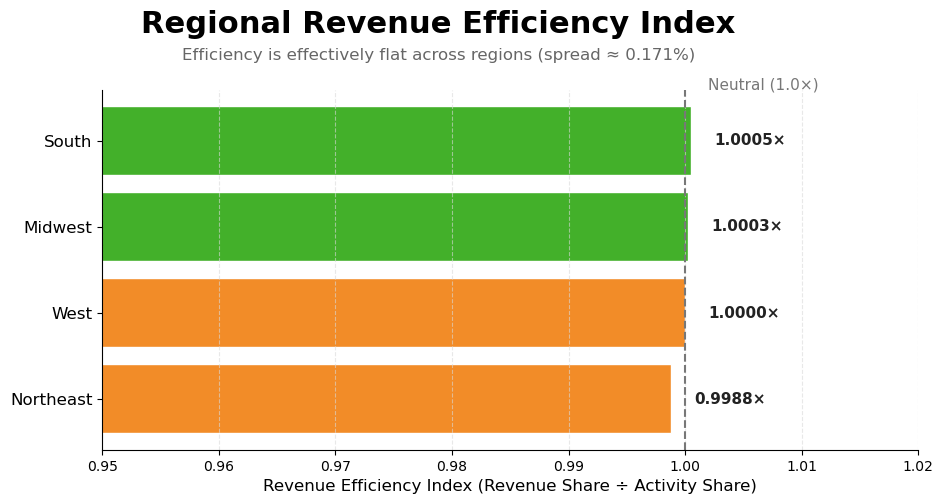

In [142]:
# Color rule: >= 1 is green, < 1 is orange (still fine, just not overstated by the axis)
colors = [IC_GREEN if v >= 1 else IC_ORANGE for v in vals]

# Build plot
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.barh(y, vals, color=colors, edgecolor="white")

# Bars
bars = ax.barh(y, vals, color=colors, edgecolor="white")

ax.set_yticks(y)
ax.set_yticklabels(chart14_plot["region"], fontsize=12)
ax.inпerAxis = ax.invert_yaxis()  # highest at top

# Value labels
for bar, v in zip(bars, vals):
    ax.text(v + 0.002,                                
        bar.get_y() + bar.get_height() / 2,
        f"{v:.4f}×",                                 
        va="center",
        ha="left",
        fontsize=11,
        weight="bold",
        color=TEXT_GRAY)

# Neutral line at 1.0
ax.axvline(1.0, linestyle="--", color=NEUTRAL, linewidth=1.5)
ax.text(1.002, -0.6, "Neutral (1.0×)", color=NEUTRAL, fontsize=11)

# Axes
ax.set_xlim(0.95, 1.02)

ax.set_xlabel("Revenue Efficiency Index (Revenue Share ÷ Activity Share)", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.6, color=GRID_GRAY)
ax.grid(axis="y", visible=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Titles + layout
spread = chart14_plot["efficiency_index"].max() - chart14_plot["efficiency_index"].min()
fig.suptitle("Regional Revenue Efficiency Index", fontsize=22, weight="bold", y=0.99)
fig.text(0.5, 0.89,
    f"Efficiency is effectively flat across regions (spread ≈ {spread*100:.3f}%)",
    ha="center",
    fontsize=12,
    color="#666666")

# Layout
fig.subplots_adjust(left=0.22, top=0.83)

# Save image
plt.savefig(
    "/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/chart_02_tier1_demographics.png",
    dpi=300, bbox_inches="tight")
plt.show()

Chart 14: Across the entire United States, Instacart monetizes activity with virtually identical efficiency everywhere. Regional revenue differences are not behavioral, not pricing-driven, not mix-driven. They are purely volume-driven.

In [143]:
# Check: are regions basically the same?
display(chart14[["region", "order_lines", "revenue", "freq_share_pct", "rev_share_pct", "efficiency_index"]].round(6))

spread = chart14["efficiency_index"].max() - chart14["efficiency_index"].min()
print("Efficiency spread (max - min):", round(spread, 8))
print("Spread as %:", round(spread * 100, 5), "%")

,region,order_lines,revenue,freq_share_pct,rev_share_pct,efficiency_index
2,South,10320831,80356358.3,33.299997,33.316029,1.000481
0,Midwest,7267902,56574626.9,23.449770,23.456039,1.000267
3,West,7934592,61746425.9,25.600835,25.600286,0.999979
1,Northeast,5470164,42516874.7,17.649397,17.627646,0.998768


Efficiency spread (max - min): 0.00171385
Spread as %: 0.17138 %


Data Source

All analyses in this notebook use the canonical dataset produced and exported in Notebook 1 (`final_cfo_dataset.pkl`).